<a href="https://colab.research.google.com/github/MehrDataPythonist/daily-dev-/blob/main/Apriori2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **With min_cof**

In [1]:
from collections import defaultdict
import itertools

def read_dataset(filename):
    transactions = []
    with open(filename, 'r') as file:
        for line in file:
            transaction = line.strip().split()
            transactions.append(transaction)
    return transactions

def generate_candidates(itemsets, k):
    candidates = set()
    itemsets_list = list(itemsets)
    for i in range(len(itemsets_list)):
        for j in range(i+1, len(itemsets_list)):
            itemset1 = itemsets_list[i]
            itemset2 = itemsets_list[j]
            if itemset1[:k-2] == itemset2[:k-2]:
                candidate = tuple(sorted(set(itemset1) | set(itemset2)))
                candidates.add(candidate)
    return candidates

# Apriori algorithm implementation
def apriori(transactions, min_sup):
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[item] += 1

    num_transactions = len(transactions)
    frequent_itemsets = [set()]
    k = 1
    while True:
        if k == 1:
            candidates = {(item,) for item, count in item_counts.items() if count >= min_sup * num_transactions}
        else:
            candidates = generate_candidates(frequent_itemsets[k-1], k)

        candidate_counts = defaultdict(int)
        for transaction in transactions:
            for candidate in candidates:
                if set(candidate).issubset(transaction):
                    candidate_counts[candidate] += 1

        frequent_itemsets.append(set())
        for candidate, count in candidate_counts.items():
            if count >= min_sup * num_transactions:
                frequent_itemsets[k].add(candidate)
                item_counts[candidate] = count

        if len(frequent_itemsets[k]) == 0:
            break

        k += 1

    return frequent_itemsets, item_counts

def generate_rules(frequent_itemsets, item_counts, min_conf):
    rules = []
    for k in range(2, len(frequent_itemsets)):
        for itemset in frequent_itemsets[k]:
            subsets = list(itertools.combinations(itemset, k-1))
            for subset in subsets:
                antecedent = tuple(subset)
                consequent = tuple(set(itemset) - set(subset))
                confidence = item_counts[itemset] / item_counts[antecedent]
                if confidence >= min_conf:
                    rules.append((antecedent, consequent, confidence, item_counts[itemset]))
    return rules

transactions = read_dataset('retail.dat')

min_sup = 0.01

frequent_itemsets, item_counts = apriori(transactions, min_sup)

print("Most Frequent Itemsets:")
for k in range(1, len(frequent_itemsets)):
    print(f"Itemsets of size {k}:")
    for itemset in frequent_itemsets[k]:
        transaction_amount = item_counts[itemset]
        print(f"{itemset} (Transaction Amount: {transaction_amount})")

min_conf = 0.5

rules = generate_rules(frequent_itemsets, item_counts, min_conf)

print("Association Rules:")
for antecedent, consequent, confidence, transaction_amount in rules:
    print(f"{antecedent} => {consequent} (Confidence: {confidence}, Transaction Amount: {transaction_amount})")

Most Frequent Itemsets:
Itemsets of size 1:
('9',) (Transaction Amount: 1372)
('1004',) (Transaction Amount: 1102)
('677',) (Transaction Amount: 1110)
('110',) (Transaction Amount: 2794)
('824',) (Transaction Amount: 1210)
('101',) (Transaction Amount: 2237)
('45',) (Transaction Amount: 911)
('255',) (Transaction Amount: 1474)
('79',) (Transaction Amount: 1600)
('258',) (Transaction Amount: 987)
('49',) (Transaction Amount: 1120)
('1146',) (Transaction Amount: 1426)
('36',) (Transaction Amount: 2936)
('117',) (Transaction Amount: 1026)
('2958',) (Transaction Amount: 904)
('533',) (Transaction Amount: 1487)
('1393',) (Transaction Amount: 1161)
('12925',) (Transaction Amount: 1467)
('413',) (Transaction Amount: 1880)
('38',) (Transaction Amount: 15596)
('438',) (Transaction Amount: 1863)
('201',) (Transaction Amount: 1133)
('19',) (Transaction Amount: 1005)
('264',) (Transaction Amount: 895)
('548',) (Transaction Amount: 1137)
('32',) (Transaction Amount: 15167)
('338',) (Transaction Amo

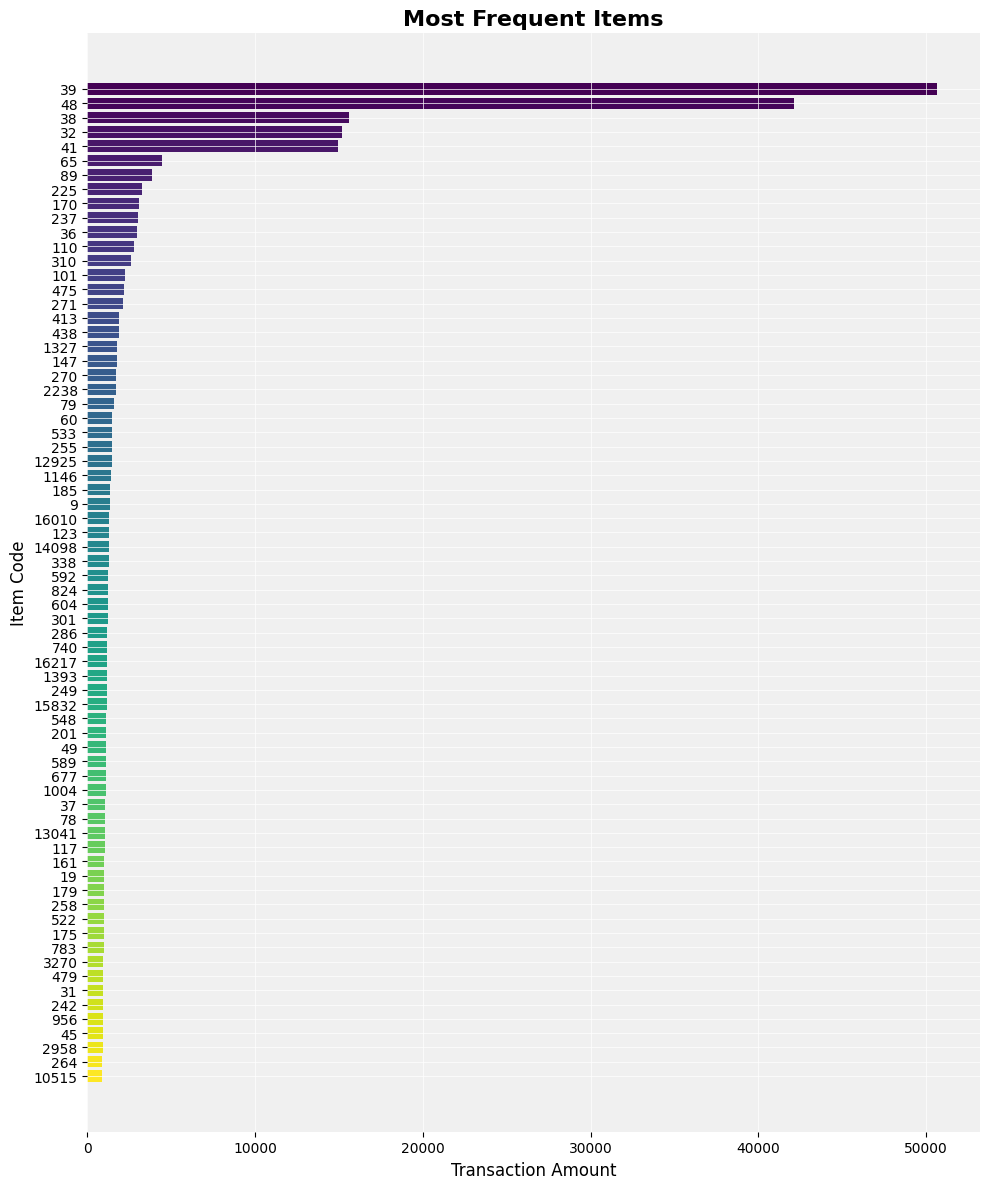

In [6]:
import numpy as np
frequent_items = frequent_itemsets[1]
item_codes = [item[0] for item in frequent_items]
transaction_amounts = [item_counts[item] for item in frequent_items]
sorted_indices = np.argsort(transaction_amounts)[::-1]
sorted_item_codes = [item_codes[i] for i in sorted_indices]
sorted_transaction_amounts = [transaction_amounts[i] for i in sorted_indices]

fig, ax = plt.subplots(figsize=(10, 12))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_item_codes)))
ax.barh(sorted_item_codes, sorted_transaction_amounts, color=colors)
ax.set_title("Most Frequent Items", fontsize=16, fontweight='bold')
ax.set_xlabel("Transaction Amount", fontsize=12)
ax.set_ylabel("Item Code", fontsize=12)
ax.invert_yaxis()
ax.set_facecolor('#f0f0f0')
ax.grid(color='white', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()

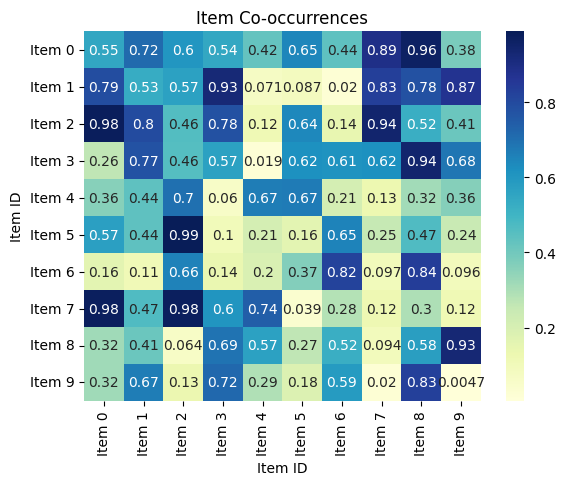

In [5]:
import pandas as pd
import numpy as np
np.random.seed(0)
item_co_occurrences = pd.DataFrame(np.random.rand(10, 10), columns=[f"Item {i}" for i in range(10)], index=[f"Item {i}" for i in range(10)])
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(item_co_occurrences, annot=True, cmap="YlGnBu")
plt.xlabel("Item ID")
plt.ylabel("Item ID")
plt.title("Item Co-occurrences")
plt.show()